In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import nltk
import re
import string 

from string import punctuation 
from nltk.corpus import stopwords 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer 
from contractions import contractions_dict
from autocorrect import Speller 



from sklearn.metrics import classification_report, confusion_matrix


from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

import emoji

from nltk.corpus import stopwords


import unidecode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
import pandas as pd
df1 = pd.read_csv('public_data_labeled.csv')
df2 = pd.read_csv('cyberbullying_tweets.csv')
df2.drop(df2[df2['cyberbullying_type'] == 'age'].index, inplace = True)
df2.drop(df2[df2['cyberbullying_type'] == 'ethnicity'].index, inplace = True)
df2.drop(df2[df2['cyberbullying_type'] == 'gender'].index, inplace = True)
df2.drop(df2[df2['cyberbullying_type'] == 'religion'].index, inplace = True)
df1['cyberbullying_type'].replace({'Non-offensive': 'not_cyberbullying', 'Offensive': 'other_cyberbullying'},inplace=True)

import random
df1.drop(random.sample(sorted(df1[df1['cyberbullying_type'] == 'other_cyberbullying'].index), 16500), inplace = True)
df = pd.concat([df1, df2] )
# df.sample(10)

<AxesSubplot:xlabel='cyberbullying_type'>

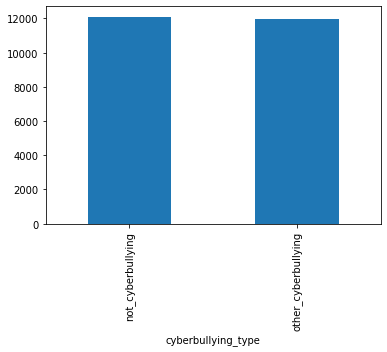

In [3]:
df.groupby('cyberbullying_type').size().plot(kind='bar')

In [4]:
df = df[~df.duplicated()]

In [5]:
def case_convert():
    df.tweet_text = [i.lower() for i in df.tweet_text.values]

In [6]:
def correct_word():
    df.tweet_text =  [Speller()(text) for text in df.tweet_text.values]

In [7]:
def convert_emoji():
    df.tweet_text = [emoji.demojize(text) for text in df.tweet_text.values]

In [8]:
def remove_specials():
    df.tweet_text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in df.tweet_text.values]

In [9]:
def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in df.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word.strip()]
            else:
                string = string + " " + word
        texts.append(string.strip())
    df.tweet_text = texts

In [10]:
def remove_abbreviations():
    abbreviations = {
        "$" : " dollar ",
        "€" : " euro ",
        "4ao" : "for adults only",
        "a.m" : "before midday",
        "a3" : "anytime anywhere anyplace",
        "aamof" : "as a matter of fact",
        "acct" : "account",
        "adih" : "another day in hell",
        "afaic" : "as far as i am concerned",
        "afaict" : "as far as i can tell",
        "afaik" : "as far as i know",
        "afair" : "as far as i remember",
        "afk" : "away from keyboard",
        "app" : "application",
        "approx" : "approximately",
        "apps" : "applications",
        "asap" : "as soon as possible",
        "asl" : "age, sex, location",
        "atk" : "at the keyboard",
        "ave." : "avenue",
        "aymm" : "are you my mother",
        "ayor" : "at your own risk", 
        "b&b" : "bed and breakfast",
        "b+b" : "bed and breakfast",
        "b.c" : "before christ",
        "b2b" : "business to business",
        "b2c" : "business to customer",
        "b4" : "before",
        "b4n" : "bye for now",
        "b@u" : "back at you",
        "bae" : "before anyone else",
        "bak" : "back at keyboard",
        "bbbg" : "bye bye be good",
        "bbc" : "british broadcasting corporation",
        "bbias" : "be back in a second",
        "bbl" : "be back later",
        "bbs" : "be back soon",
        "be4" : "before",
        "bfn" : "bye for now",
        "blvd" : "boulevard",
        "bout" : "about",
        "brb" : "be right back",
        "bros" : "brothers",
        "brt" : "be right there",
        "bsaaw" : "big smile and a wink",
        "btw" : "by the way",
        "bwl" : "bursting with laughter",
        "c/o" : "care of",
        "cet" : "central european time",
        "cf" : "compare",
        "cia" : "central intelligence agency",
        "csl" : "can not stop laughing",
        "cu" : "see you",
        "cul8r" : "see you later",
        "cv" : "curriculum vitae",
        "cwot" : "complete waste of time",
        "cya" : "see you",
        "cyt" : "see you tomorrow",
        "dae" : "does anyone else",
        "dbmib" : "do not bother me i am busy",
        "diy" : "do it yourself",
        "dm" : "direct message",
        "dwh" : "during work hours",
        "e123" : "easy as one two three",
        "eet" : "eastern european time",
        "eg" : "example",
        "embm" : "early morning business meeting",
        "encl" : "enclosed",
        "encl." : "enclosed",
        "etc" : "and so on",
        "faq" : "frequently asked questions",
        "fawc" : "for anyone who cares",
        "fb" : "facebook",
        "fc" : "fingers crossed",
        "fig" : "figure",
        "fimh" : "forever in my heart", 
        "ft." : "feet",
        "ft" : "featuring",
        "ftl" : "for the loss",
        "ftw" : "for the win",
        "fwiw" : "for what it is worth",
        "fyi" : "for your information",
        "g9" : "genius",
        "gahoy" : "get a hold of yourself",
        "gal" : "get a life",
        "gcse" : "general certificate of secondary education",
        "gfn" : "gone for now",
        "gg" : "good game",
        "gl" : "good luck",
        "glhf" : "good luck have fun",
        "gmt" : "greenwich mean time",
        "gmta" : "great minds think alike",
        "gn" : "good night",
        "g.o.a.t" : "greatest of all time",
        "goat" : "greatest of all time",
        "goi" : "get over it",
        "gps" : "global positioning system",
        "gr8" : "great",
        "gratz" : "congratulations",
        "gyal" : "girl",
        "h&c" : "hot and cold",
        "hp" : "horsepower",
        "hr" : "hour",
        "hrh" : "his royal highness",
        "ht" : "height",
        "ibrb" : "i will be right back",
        "ic" : "i see",
        "icq" : "i seek you",
        "icymi" : "in case you missed it",
        "idc" : "i do not care",
        "idgadf" : "i do not give a damn fuck",
        "idgaf" : "i do not give a fuck",
        "idk" : "i do not know",
        "ie" : "that is",
        "i.e" : "that is",
        "ifyp" : "i feel your pain",
        "IG" : "instagram",
        "iirc" : "if i remember correctly",
        "ilu" : "i love you",
        "ily" : "i love you",
        "imho" : "in my humble opinion",
        "imo" : "in my opinion",
        "imu" : "i miss you",
        "iow" : "in other words",
        "irl" : "in real life",
        "j4f" : "just for fun",
        "jic" : "just in case",
        "jk" : "just kidding",
        "jsyk" : "just so you know",
        "l8r" : "later",
        "lb" : "pound",
        "lbs" : "pounds",
        "ldr" : "long distance relationship",
        "lmao" : "laugh my ass off",
        "lmfao" : "laugh my fucking ass off",
        "lol" : "laughing out loud",
        "ltd" : "limited",
        "ltns" : "long time no see",
        "m8" : "mate",
        "mf" : "motherfucker",
        "mfs" : "motherfuckers",
        "mfw" : "my face when",
        "mofo" : "motherfucker",
        "mph" : "miles per hour",
        "mr" : "mister",
        "mrw" : "my reaction when",
        "ms" : "miss",
        "mte" : "my thoughts exactly",
        "nagi" : "not a good idea",
        "nbc" : "national broadcasting company",
        "nbd" : "not big deal",
        "nfs" : "not for sale",
        "ngl" : "not going to lie",
        "nhs" : "national health service",
        "nrn" : "no reply necessary",
        "nsfl" : "not safe for life",
        "nsfw" : "not safe for work",
        "nth" : "nice to have",
        "nvr" : "never",
        "nyc" : "new york city",
        "oc" : "original content",
        "og" : "original",
        "ohp" : "overhead projector",
        "oic" : "oh i see",
        "omdb" : "over my dead body",
        "omg" : "oh my god",
        "omw" : "on my way",
        "p.a" : "per annum",
        "p.m" : "after midday",
        "pm" : "prime minister",
        "poc" : "people of color",
        "pov" : "point of view",
        "pp" : "pages",
        "ppl" : "people",
        "prw" : "parents are watching",
        "ps" : "postscript",
        "pt" : "point",
        "ptb" : "please text back",
        "pto" : "please turn over",
        "qpsa" : "what happens", #"que pasa",
        "ratchet" : "rude",
        "rbtl" : "read between the lines",
        "rlrt" : "real life retweet", 
        "rofl" : "rolling on the floor laughing",
        "roflol" : "rolling on the floor laughing out loud",
        "rotflmao" : "rolling on the floor laughing my ass off",
        "rt" : "retweet",
        "ruok" : "are you ok",
        "sfw" : "safe for work",
        "sk8" : "skate",
        "smh" : "shake my head",
        "sq" : "square",
        "srsly" : "seriously", 
        "ssdd" : "same stuff different day",
        "tbh" : "to be honest",
        "tbs" : "tablespooful",
        "tbsp" : "tablespooful",
        "tfw" : "that feeling when",
        "thks" : "thank you",
        "tho" : "though",
        "thx" : "thank you",
        "tia" : "thanks in advance",
        "til" : "today i learned",
        "tl;dr" : "too long i did not read",
        "tldr" : "too long i did not read",
        "tmb" : "tweet me back",
        "tntl" : "trying not to laugh",
        "ttyl" : "talk to you later",
        "u" : "you",
        "u2" : "you too",
        "u4e" : "yours for ever",
        "utc" : "coordinated universal time",
        "w/" : "with",
        "w/o" : "without",
        "w8" : "wait",
        "wassup" : "what is up",
        "wb" : "welcome back",
        "wtf" : "what the fuck",
        "wtg" : "way to go",
        "wtpa" : "where the party at",
        "wuf" : "where are you from",
        "wuzup" : "what is up",
        "wywh" : "wish you were here",
        "yd" : "yard",
        "ygtr" : "you got that right",
        "ynk" : "you never know",
        "zzz" : "sleeping bored and tired"
    }
    texts = []
    for text in df.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(abbreviations.keys()):
                string = string + " " + abbreviations[word.strip()]
            else:
                string = string + " " + word
        texts.append(string.strip())
    df.tweet_text = texts

In [11]:
def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in df.tweet_text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
    df.tweet_text = texts

In [12]:
def remove_links():
    texts = []
    for text in df.tweet_text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    df.tweet_text = texts

In [13]:
def remove_accents():
    df.tweet_text = [unidecode.unidecode(text) for text in df.tweet_text.values]

In [14]:
def normalize_spaces():
    df.tweet_text = [re.sub(r"\s+"," ",text) for text in df.tweet_text.values]

In [15]:
lemmatizer = WordNetLemmatizer()

def pos_tagger(nltk_tag):
	if nltk_tag.startswith('J'):
		return wordnet.ADJ
	elif nltk_tag.startswith('V'):
		return wordnet.VERB
	elif nltk_tag.startswith('N'):
		return wordnet.NOUN
	elif nltk_tag.startswith('R'):
		return wordnet.ADV
	else:		
		return None



def lemmatize():
	texts = []
	for sentence in df.tweet_text.values:
		pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
		wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
		lemmatized_sentence = []
		for word, tag in wordnet_tagged:
			if tag is None:
				lemmatized_sentence.append(word)
			else:	
				lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
		lemmatized_sentence = " ".join(lemmatized_sentence)
		texts.append(lemmatized_sentence)
	df.tweet_text = texts

In [16]:
convert_emoji()
# print('convert_emoji done')
# correct_word()
# print('correct_word done')
case_convert()
remove_abbreviations()
#print('case_convert done')
remove_links()
#print('remove_links done')
remove_shorthands()
#print('remove_shorthands done')
remove_accents()
#print('remove_accents done')
remove_specials()
#print('remove_specials done')
remove_stopwords()
#print('remove_stopwords done')
normalize_spaces()
#print('normalize_spaces done')
lemmatize()
#print('lemmatize done')

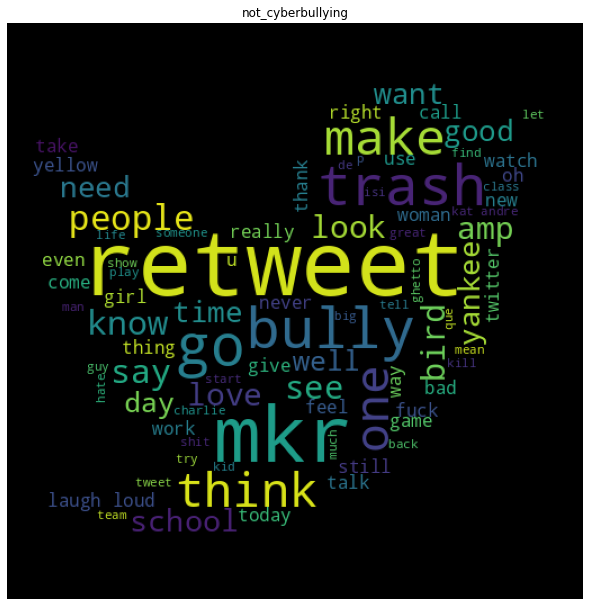

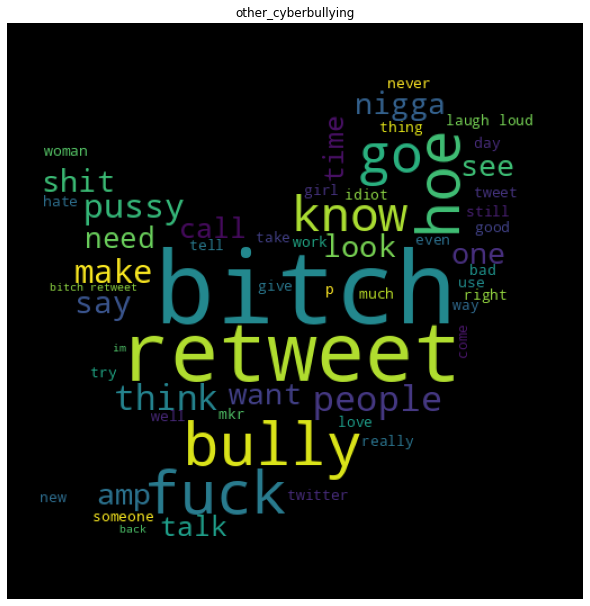

In [17]:
lenc = LabelEncoder()
fit_lenc = lenc.fit(df.cyberbullying_type)
df.cyberbullying_type = fit_lenc.transform(df.cyberbullying_type)
fit_lenc.classes_
for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    custom_mask = np.array(Image.open('twi.png')) 
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                mask = custom_mask,
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(fit_lenc.classes_[c])
    plt.show()
    del string

In [18]:
from sklearn.model_selection import train_test_split
vec = CountVectorizer(max_features=3000).fit(df.tweet_text.values)
X_train, X_test, Y_train, Y_test = train_test_split(vec.transform(df.tweet_text.values).toarray(), 
                                                    df.cyberbullying_type.values.reshape(-1,1), 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10, random_state=42)
# model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, Y_train)
z = model.predict(X_test)
print('Classification Report for RandomForestClassifier:\n',classification_report(Y_test, z,target_names=fit_lenc.classes_))

/tmp/ipykernel_8341/320717574.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


Classification Report for RandomForestClassifier:
                      precision    recall  f1-score   support

  not_cyberbullying       0.73      0.73      0.73      1186
other_cyberbullying       0.74      0.74      0.74      1219

           accuracy                           0.73      2405
          macro avg       0.73      0.73      0.73      2405
       weighted avg       0.73      0.73      0.73      2405



In [20]:
import pickle
pickle.dump(model, open('n_model.pkl', 'wb'))
pickle.dump(vec, open('n_count_vectorizer.pkl', 'wb'))
pickle.dump(fit_lenc, open('n_fit_lenc.pkl', 'wb'))

In [21]:
# ex = '''love'''
# ex = vec.transform([ex]).toarray()
# print(ex)
# ex_pred = model.predict(ex)
# y_pred = fit_lenc.inverse_transform(ex_pred)
# print(y_pred)